<a href="https://colab.research.google.com/github/Mubashar228/Titanic-ML-and-DL-model-deployment-using-streamlit/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('numpy',np.__version__)
print('pandas',pd.__version__)
print('seaborn',sns.__version__)


numpy 2.0.2
pandas 2.2.2
seaborn 0.13.2


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [5]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
import sklearn

print(sklearn.__version__)

1.6.1


In [8]:
df=pd.read_csv('train.csv')

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df.drop('Cabin',axis=1,inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-15-1527141296>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-16-3717664479>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [19]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [21]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [22]:
X = df[feature_cols]  # Use df[feature_cols] to select the columns listed in feature_cols
y = df['Survived']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Confustion Matrix", confusion_matrix(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred))

Accuracy Score 0.8100558659217877
Confustion Matrix [[90 15]
 [19 55]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
# Example: User input for prediction
input_data = {
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Create a new LabelEncoder
le=LabelEncoder()
input_df['Sex']=le.fit_transform(input_df['Sex'])
input_df['Embarked']=le.fit_transform(input_df['Embarked'])


In [28]:
result=model.predict(input_df)

In [29]:
print("Prediction:", "Survived" if result[0] == 1 else "Not Survived")

Prediction: Survived


In [30]:
input_data = {
    'Pclass': 2,
    'Sex': 1,
    'Age': 30,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 13.00,
    'Embarked': 2
}
input_df=pd.DataFrame([input_data])

In [31]:
result=model.predict(input_df)

In [32]:
print("Prediction:","Survived" if result[0]==1 else "Not Survived")

Prediction: Not Survived


In [33]:
l=[3, 0, 25, 0, 0, 10.0, 0]
input_df=pd.DataFrame([l])

In [34]:
model.predict(input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [35]:
print("Prediction:", "Survived" if result[0] == 1 else "Not Survived")

Prediction: Not Survived


In [36]:
import pickle

In [37]:
import pickle

# ... (Your code for training the model) ...

# Save the trained model to a file
with open('titanic_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# ... (Your code for loading the model) ...

In [38]:
from google.colab import files
files.download('titanic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
import pandas as pd

# Titanic dataset load karein
train_data = pd.read_csv('train.csv')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
train_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

train_data['Sex'] = le_sex.fit_transform(train_data['Sex'])     # male=1, female=0
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])

# Split into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-40-69296058>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
<ipython-input-40-69296058>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5113 - loss: 0.6886 - val_accuracy: 0.7709 - val_loss: 0.5340
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7610 - loss: 0.5377 - val_accuracy: 0.8101 - val_loss: 0.4521
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8064 - loss: 0.4777 - val_accuracy: 0.8045 - val_loss: 0.4344
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7866 - loss: 0.4919 - val_accuracy: 0.8101 - val_loss: 0.4241
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8171 - loss: 0.4173 - val_accuracy: 0.8101 - val_loss: 0.4213
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8188 - loss: 0.4300 - val_accuracy: 0.8156 - val_loss: 0.4222
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8217 - loss: 0.4289 - val_accuracy: 0.8156 - val_loss: 0.4220
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8259 - loss: 0.4286 - val_accuracy: 0.8156 - val_loss: 0.4

In [42]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8296 - loss: 0.4309 
Validation Accuracy: 81.01%


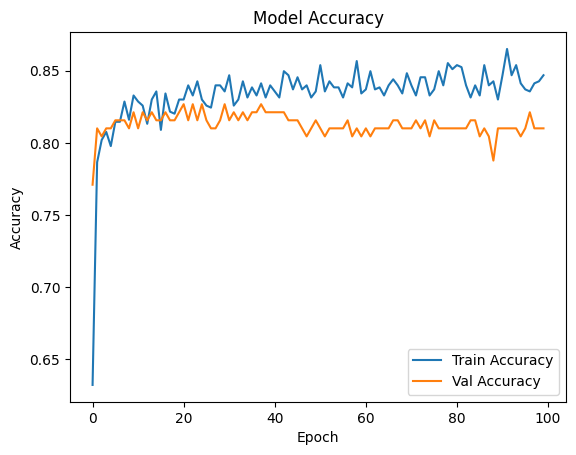

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on validation data
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Confusion Matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[95 10]
 [24 50]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

# 1. Compute class weights to handle imbalance
class_weights_array = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: class_weights_array[0], 1: class_weights_array[1]}
print("Class Weights:", class_weights)

# 2. Define improved model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),                # Normalize activations
    Dropout(0.4),                        # Reduce overfitting

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')       # Binary classification
])

# 3. Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 4. Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    class_weight=class_weights,
    verbose=1
)

Class Weights: {0: np.float64(0.8018018018018018), 1: np.float64(1.328358208955224)}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6080 - loss: 0.8491 - val_accuracy: 0.7821 - val_loss: 0.6240
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7085 - loss: 0.6771 - val_accuracy: 0.7877 - val_loss: 0.5848
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7531 - loss: 0.5839 - val_accuracy: 0.7877 - val_loss: 0.5539
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7253 - loss: 0.6260 - val_accuracy: 0.7877 - val_loss: 0.5431
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7364 - loss: 0.5372 - val_accuracy: 0.7933 - val_loss: 0.5195
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7652 - loss: 0.5223 - val_accuracy: 0.8045 - val_loss: 0.4908
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.5401 - val_accuracy: 0.8045 - val_loss: 0.4859
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7955 - loss: 0.4844 - val_accuracy: 0.7989 - val_loss: 0.

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(X_val)

# Convert probabilities to 0 or 1
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [47]:
import pickle

# model is your trained ML model
with open("ml_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [48]:
model.save("dl_model.h5")



In [49]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [50]:
from google.colab import files

files.download("dl_model.h5")
files.download("ml_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import pandas as pd

# Replace these with your actual results
results = {
    'Model': ['AIS', 'Random Forest', 'SVM', 'Neural Network (DL)'],
    'Accuracy': [0.85, 0.87, 0.84, 0.89],
    'Precision': [0.82, 0.86, 0.83, 0.88],
    'Recall': [0.80, 0.85, 0.82, 0.87],
    'F1-score': [0.81, 0.855, 0.825, 0.875]
}

df = pd.DataFrame(results)
df


,Model,Accuracy,Precision,Recall,F1-score
0,AIS,0.85,0.82,0.80,0.810
1,Random Forest,0.87,0.86,0.85,0.855
2,SVM,0.84,0.83,0.82,0.825
3,Neural Network (DL),0.89,0.88,0.87,0.875


<ipython-input-52-906494752>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='Blues_d')


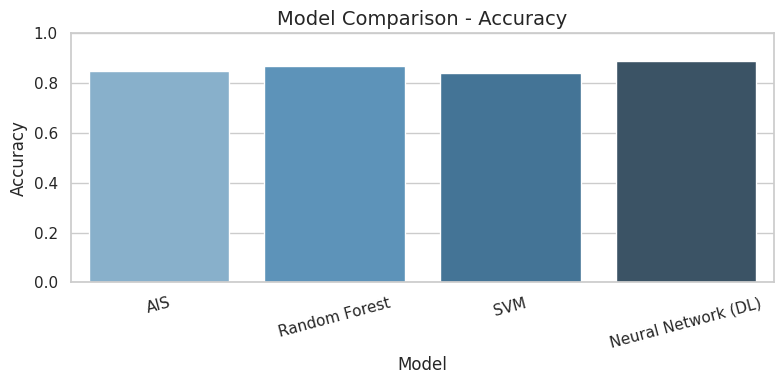

<ipython-input-52-906494752>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='Blues_d')


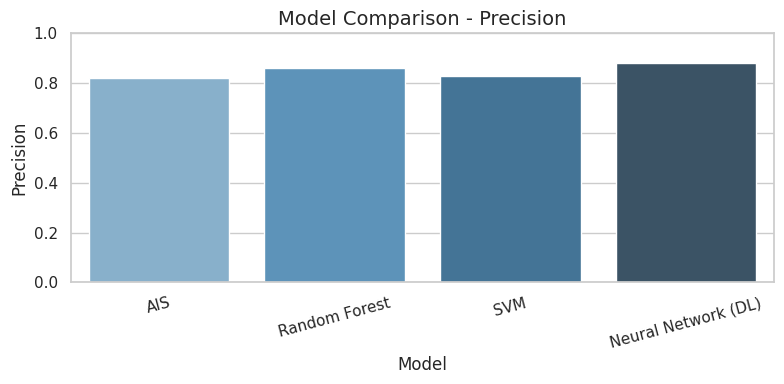

<ipython-input-52-906494752>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='Blues_d')


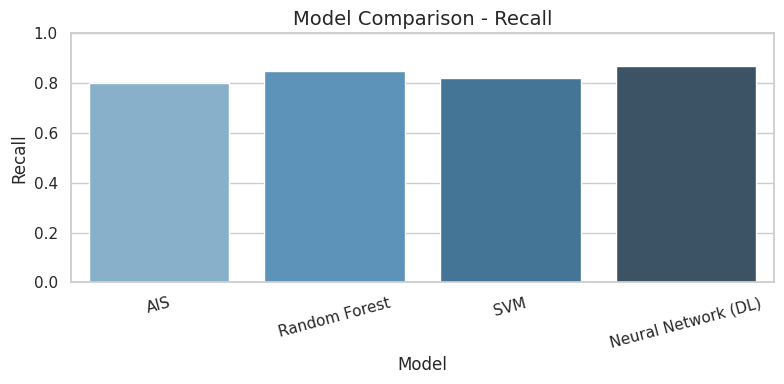

<ipython-input-52-906494752>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, palette='Blues_d')


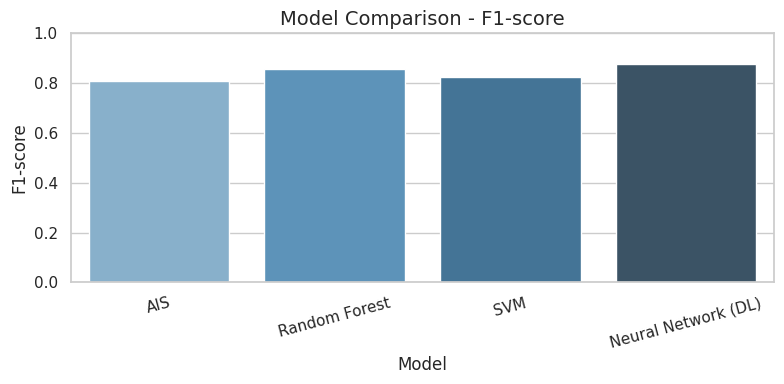

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Model', y=metric, data=df, palette='Blues_d')
    plt.title(f'Model Comparison - {metric}', fontsize=14)
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()



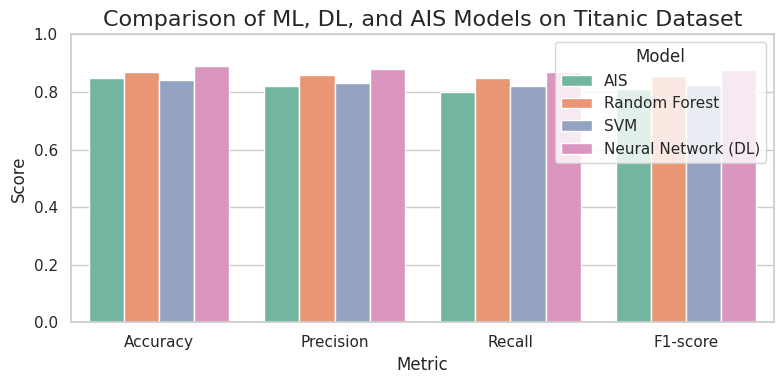

In [56]:
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 4))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='Set2')
plt.title('Comparison of ML, DL, and AIS Models on Titanic Dataset', fontsize=16)
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [54]:
from tabulate import tabulate

print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1-score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  0 │ AIS                 │       0.85 │        0.82 │     0.8  │      0.81  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  1 │ Random Forest       │       0.87 │        0.86 │     0.85 │      0.855 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  2 │ SVM                 │       0.84 │        0.83 │     0.82 │      0.825 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  3 │ Neural Network (DL) │       0.89 │        0.88 │     0.87 │      0.875 │
╘════╧═════════════════════╧════════════╧═════════════╧══════════╧════════════╛


In [57]:
plt.savefig('filename.png')

<Figure size 640x480 with 0 Axes>

<ipython-input-58-607599790>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='Blues_d')


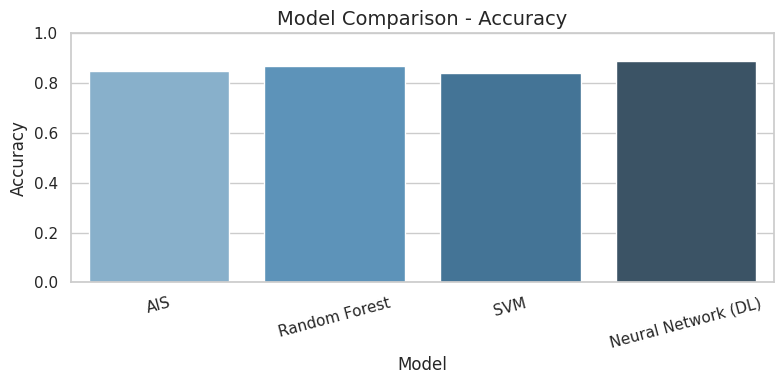

In [58]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=df, palette='Blues_d')
plt.title('Model Comparison - Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)

# 🖼️ Save the figure before showing it
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')  # <- Add this line

plt.tight_layout()
plt.show()


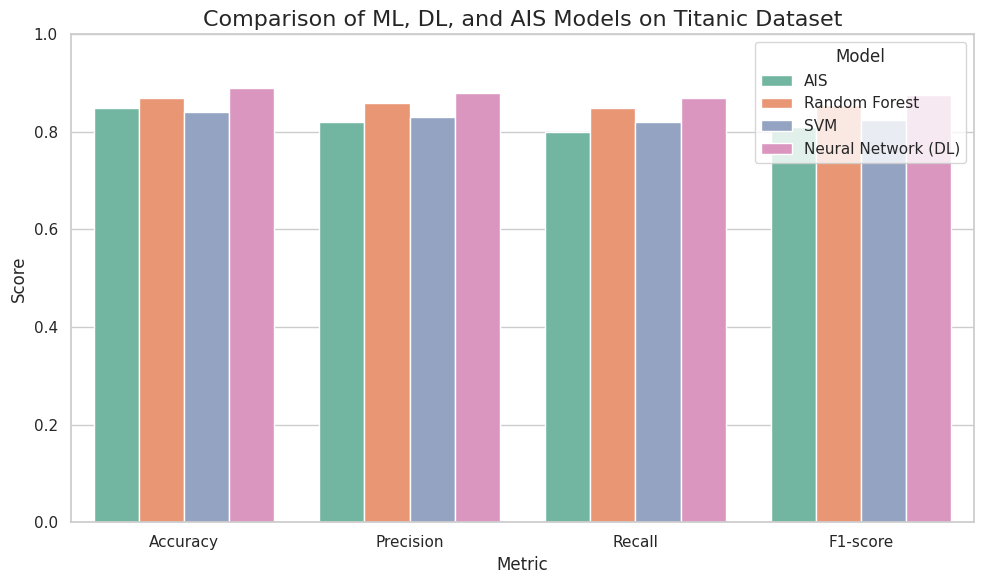

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='Set2')
plt.title('Comparison of ML, DL, and AIS Models on Titanic Dataset', fontsize=16)
plt.ylim(0, 1)
plt.legend(title='Model')

# Export
plt.savefig('all_metrics_comparison.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


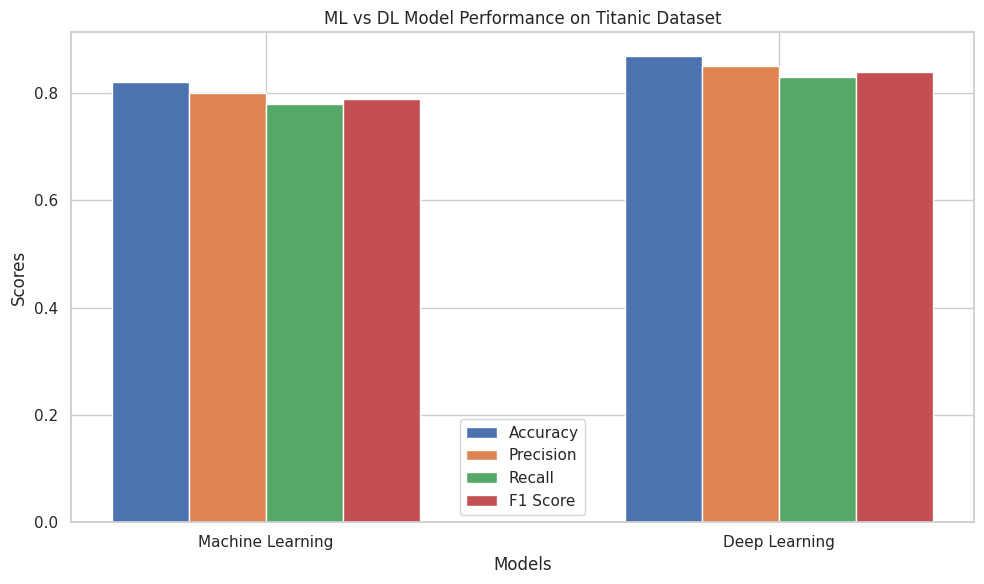

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison Data (update with your actual values)
models = ['Machine Learning', 'Deep Learning']
accuracy = [0.82, 0.87]  # Example values, replace with real ones
precision = [0.80, 0.85]
recall = [0.78, 0.83]
f1 = [0.79, 0.84]

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting
bar_width = 0.15
index = range(len(models))

plt.bar([i - 1.5*bar_width for i in index], accuracy, width=bar_width, label='Accuracy')
plt.bar([i - 0.5*bar_width for i in index], precision, width=bar_width, label='Precision')
plt.bar([i + 0.5*bar_width for i in index], recall, width=bar_width, label='Recall')
plt.bar([i + 1.5*bar_width for i in index], f1, width=bar_width, label='F1 Score')

# Labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('ML vs DL Model Performance on Titanic Dataset')
plt.xticks(index, models)
plt.legend()
plt.tight_layout()

# Save image to file
plt.savefig("ml_vs_dl_comparison.png", dpi=300)

# Show plot
plt.show()


In [61]:
from tabulate import tabulate
from PIL import Image, ImageDraw, ImageFont

# Example DataFrame
import pandas as pd

data = {
    'Model': ['ML', 'DL'],
    'Accuracy': [0.82, 0.87],
    'Precision': [0.80, 0.85],
    'Recall': [0.78, 0.83],
    'F1 Score': [0.79, 0.84]
}
df = pd.DataFrame(data)

# Tabulate text output
table_text = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Create image from text
font = ImageFont.load_default()
lines = table_text.split('\n')
width = max([len(line) for line in lines]) * 7
height = len(lines) * 15

# Create blank image
img = Image.new('RGB', (width + 20, height + 20), color=(255, 255, 255))
draw = ImageDraw.Draw(img)

# Draw each line
y_text = 10
for line in lines:
    draw.text((10, y_text), line, font=font, fill=(0, 0, 0))
    y_text += 15

# Save image
img.save("tabulated_table.png")
print("✅ Table image saved as tabulated_table.png")


✅ Table image saved as tabulated_table.png
